# Initial value problems

## Runge-Kutta orbit integrations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

In [2]:
def derivs_orbit(t, x):
    rr = (x[0]**2 + x[1]**2)**0.5
    vxdot = -x[0]/rr**3
    vydot = -x[1]/rr**3
    xdot = x[2]
    ydot = x[3]
    return np.array((xdot,ydot,vxdot,vydot))

In [3]:
def euler(nsteps, dt, x0, derivs):
    x = np.zeros((nsteps,len(x0)))
    x[0] = x0
    for i in range(1,nsteps):    
        f = derivs((i-1)*dt, x[i-1])
        x[i] = x[i-1] + f*dt
    return x

def midpoint(nsteps, dt, x0, derivs):
    x = np.zeros((nsteps,len(x0)))
    x[0] = x0
    for i in range(1,nsteps):    
        f = derivs((i-1)*dt, x[i-1])
        f1 = derivs((i-1)*dt + dt/2, x[i-1] + f*dt/2)
        x[i] = x[i-1] + f1*dt        
    return x

def rk4(nsteps, dt, x0, derivs):
    x = np.zeros((nsteps,len(x0)))
    x[0] = x0
    for i in range(1,nsteps):    
        f = derivs((i-1)*dt, x[i-1])
        f1 = derivs((i-1)*dt + dt/2, x[i-1] + f*dt/2)
        f2 = derivs((i-1)*dt + dt/2, x[i-1] + f1*dt/2)
        f3 = derivs(i*dt, x[i-1] + f2*dt)
        x[i] = x[i-1] + dt*(f + 2*f1 + 2*f2 + f3)/6
    return x

nsteps = 10, err1 = 2.59535, err2 = -0.997537, err4 = 0.174884
nsteps = 100, err1 = -1.61962, err2 = -0.0155004, err4 = 3.17648e-06
nsteps = 1000, err1 = -0.358534, err2 = -0.000145888, err4 = 2.33419e-10
nsteps = 10000, err1 = -0.0371289, err2 = -1.44817e-06, err4 = 7.6971e-14
scipy gives  0.0001564960035684848  with 140 evaluations


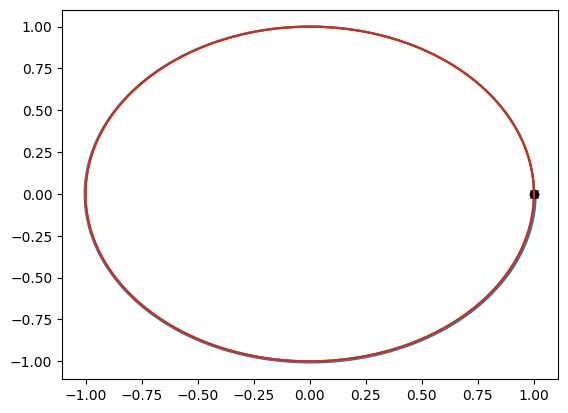

In [4]:
# Compute the orbit with different numbers of steps and methods to compare

for nsteps in np.array((10,100,1000,10000)):

    dt = 2 * np.pi / (nsteps-1)
    t = np.arange(nsteps)*dt
    x_start = np.array((1,0,0,1))
    x1 = euler(nsteps, dt, x_start, derivs_orbit)
    x2 = midpoint(nsteps, dt, x_start, derivs_orbit)
    x4 = rk4(nsteps, dt, x_start, derivs_orbit)

    print("nsteps = %d, err1 = %lg, err2 = %lg, err4 = %lg" % (nsteps, x1[-1,1], x2[-1,1], x4[-1,1]))
    
plt.plot(x1[:,0], x1[:,1])
plt.plot(x2[:,0], x2[:,1])
plt.plot(x4[:,0], x4[:,1])

plt.plot(x4[0,0],x4[0,1],'ko')
plt.plot(x4[-1,0],x4[-1,1],'kx')

result = scipy.integrate.solve_ivp(derivs_orbit, (0.0,2.0*np.pi), x_start, t_eval=t, atol=1e-6, rtol=1e-6)

x,y, vx, vy = result.y

print('scipy gives ', y[-1], ' with %d evaluations' % (result.nfev,))
plt.plot(x,y)
plt.show()

nsteps = 10, err4 = 0.174884
nsteps = 31, err4 = 0.000602067
nsteps = 100, err4 = 3.17648e-06
nsteps = 316, err4 = 2.53835e-08
nsteps = 1000, err4 = 2.33419e-10
nsteps = 3162, err4 = 2.36498e-12
nsteps = 10000, err4 = 7.6971e-14
nsteps = 31622, err4 = 1.44745e-13
nsteps = 100000, err4 = 1.34684e-13
nsteps = 316227, err4 = 5.66926e-14
nsteps = 1000000, err4 = -4.41624e-13


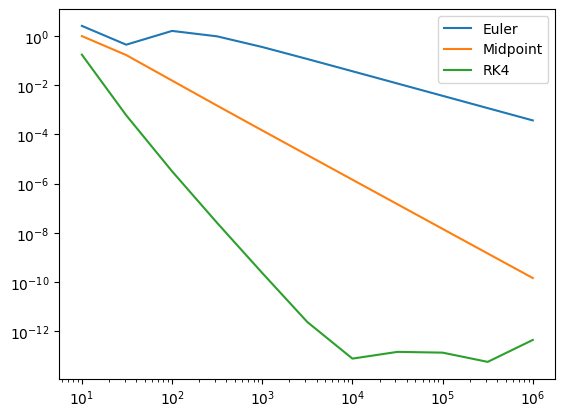

In [8]:
# Calculate the scaling with N

nvals = np.array([])
evals1 = np.array([])
evals2 = np.array([])
evals4 = np.array([])

for n in np.arange(1,6.5,0.5):

    nsteps = int(10**n)
    dt = 2 * np.pi / (nsteps-1)
    t = np.arange(nsteps)*dt
    x_start = np.array((1,0,0,1))
    x1 = euler(nsteps, dt, x_start, derivs_orbit)
    x2 = midpoint(nsteps, dt, x_start, derivs_orbit)
    x4 = rk4(nsteps, dt, x_start, derivs_orbit)

    print("nsteps = %d, err4 = %lg" % (nsteps, x4[-1,1]))
    nvals = np.append(nvals, nsteps)
    evals1 = np.append(evals1, abs(x1[-1,1]))
    evals2 = np.append(evals2, abs(x2[-1,1]))
    evals4 = np.append(evals4, abs(x4[-1,1]))

plt.plot(nvals, evals1, label='Euler')
plt.plot(nvals, evals2, label='Midpoint')
plt.plot(nvals, evals4, label='RK4')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()

## Implicit methods

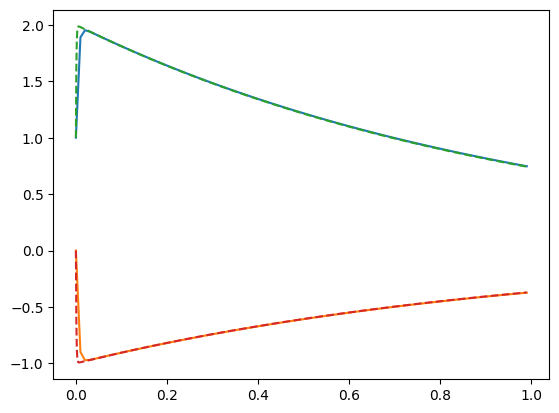

In [15]:
# The equations are linear with constant coefficients, so don't need
# to do a Newton solve
# We just need to specify the matrix of coefficients
C = np.array([[-998,-1998],[999,1999]])

h = 1e-2
nsteps = 100

x = np.zeros((nsteps,2))

# Explicit update
#A = np.identity(2) - h*C
# Implicit update
A = np.linalg.inv(np.identity(2) + h*C)

# Initial conditions
x[0,0] = 1
x[0,1] = 0

for i in range(1,nsteps):
    x[i] = A@x[i-1]
    
t = h * np.arange(nsteps)

plt.plot(t,x[:,0])
plt.plot(t,x[:,1])

# Plot the analytic solutions for comparison
t_anal = np.linspace(t[0], t[-1], 1000)
plt.plot(t_anal, 2*np.exp(-t_anal)-np.exp(-1000*t_anal),"--")
plt.plot(t_anal, -np.exp(-t_anal)+np.exp(-1000*t_anal),"--")

plt.show()